In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Social_Net_class.csv')

In [3]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
X = df.iloc[  :  ,  [2,3]].values

In [5]:
Y = df.iloc[   : , -1].values

In [6]:
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

C:\Users\Vivek Nikam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
SS = StandardScaler()

In [10]:
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

C:\Users\Vivek Nikam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
X_train

array([[ 2.15212706, -0.83903084],
       [-0.22741636,  0.28721424],
       [ 2.05694532,  0.19589707],
       [-0.22741636,  0.56116574],
       [ 0.15331058,  0.04370179],
       [-0.98887026, -1.50869007],
       [-1.46477894, -1.56956818],
       [-0.22741636,  0.1045799 ],
       [-0.03705289,  0.28721424],
       [-1.27441547,  0.43940952],
       [-0.03705289,  0.31765329],
       [ 1.86658185, -0.29112783],
       [-0.22741636,  0.22633612],
       [ 0.43885579,  0.31765329],
       [-0.22741636,  0.65248291],
       [-1.75032416,  0.46984857],
       [ 1.96176359, -0.68683556],
       [-0.22741636, -0.32156688],
       [-0.03705289, -0.23024972],
       [-0.41777984, -1.26517762],
       [ 0.34367406, -0.74771367],
       [-0.03705289,  0.16545801],
       [ 0.15331058,  0.16545801],
       [ 0.91476448, -1.20429951],
       [-0.22741636,  0.16545801],
       [-0.03705289,  0.71336102],
       [ 1.00994622,  0.62204385],
       [-1.84550589, -0.53464028],
       [ 0.05812885,

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
LR = LogisticRegression()

In [14]:
LR.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
Y_predict = LR.predict(X_test)

In [16]:
Y_predict,Y_test

(array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64))

In [17]:
LR.score(X_test,Y_test)

0.85

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(Y_test,Y_predict)

In [20]:
cm

array([[67,  5],
       [13, 35]], dtype=int64)

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

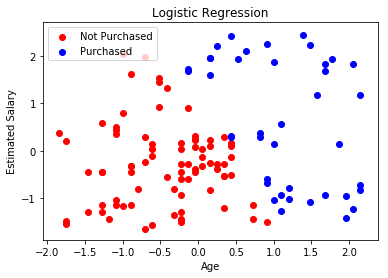

In [31]:
plt.scatter(X_test[Y_predict==0,0],X_test[Y_predict==0,1],c='red',label='Not Purchased')
plt.scatter(X_test[Y_predict==1,0],X_test[Y_predict==1,1],c='blue',label='Purchased')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Logistic Regression')
plt.legend()